In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from scipy.signal import savgol_filter
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA as pca
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

plt.style.use('ggplot')

In [2]:
x1 = 291.4
x2 = 3823.2

X1 = pd.read_csv('ethanol_cell_8x8.csv')
X2 = pd.read_csv('formalin_cell_8x8.csv')
X3 = pd.read_csv('methanol_cell_8x8.csv')
X4 = pd.read_csv('pure_cell_8x8.csv')

X1 = X1.loc[:,str(x1):str(x2)]
X2 = X2.loc[:,str(x1):str(x2)]
X3 = X3.loc[:,str(x1):str(x2)]
X4 = X4.loc[:,str(x1):str(x2)]


In [3]:
print(X1.shape)
print(X2.shape)


(64, 1340)
(48, 1340)


In [4]:
X = X1.append(X3)
X = X.append(X4)
X = X.append(X2)

Перевірка осі Х

In [5]:
Y = pd.read_csv('ethanol_cell_8x8.csv', header=None)
Y.columns  = list(Y.iloc[0, :])
y1 = Y.loc[0,x1:x2]

In [6]:
y1.shape

(1340,)

In [7]:
X_np = np.asarray(X)

In [8]:
X_np.shape

(240, 1340)

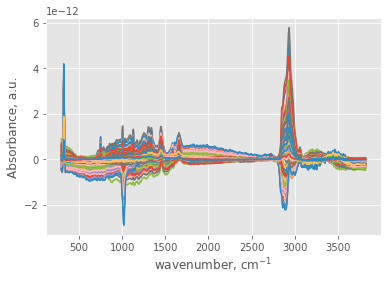

In [9]:
for i in range(len(X_np)):
    plt.plot(y1, X_np[i,:])
plt.xlabel('wavenumber, cm$^{-1}$')
plt.ylabel('Absorbance, a.u.')
plt.show()

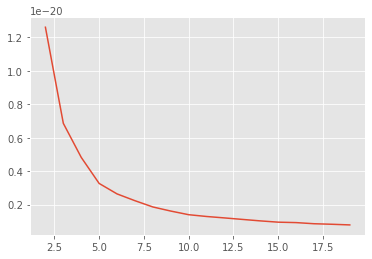

In [10]:
crit = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X)
    
    crit.append(kmeans.inertia_)

plt.plot(range(2,20), crit)

In [11]:
nspec, nw = X_np.shape

In [12]:
n_clusters = 8

kmeans = KMeans(n_clusters=n_clusters, init='k-means++')

kmeans.fit(X)

KMeans()

In [13]:
X['labels'] = kmeans.labels_
labels_mean = X.groupby(['labels']).mean()

In [14]:
labels1 = kmeans.labels_[0:64]
labels2 = kmeans.labels_[192:240]
labels3 = kmeans.labels_[64:128]
labels4 = kmeans.labels_[128:192]

In [15]:
labels_arr = {'ethanol':labels1, 'formalin':labels2, 'methanol':labels3, 'pure':labels4}

In [16]:
y1.index = y1

In [17]:
def plot_all(n, hight, width, material_n, labels_arr):
    fig, axes = plt.subplots(nrows=material_n+1, ncols=n_clusters, figsize=(30,10))
        
    for i in range(n_clusters):
        axes[0,i].set(title = "Cluster " + str(i))
        axes[0,i].plot(y1, labels_mean.loc[i])
        
    k=1
    for key in labels_arr:
            
        for i in range(n_clusters):
            cl = np.zeros(n)
                
            for j in range(len(labels_arr[key])):
                if i == labels_arr[key][j]:
                    cl[j] = 1
                R = np.reshape(cl, (hight, width))
                axes[k,i].imshow(R)
            axes[k,0].set_ylabel(key)
        k+=1
            
            


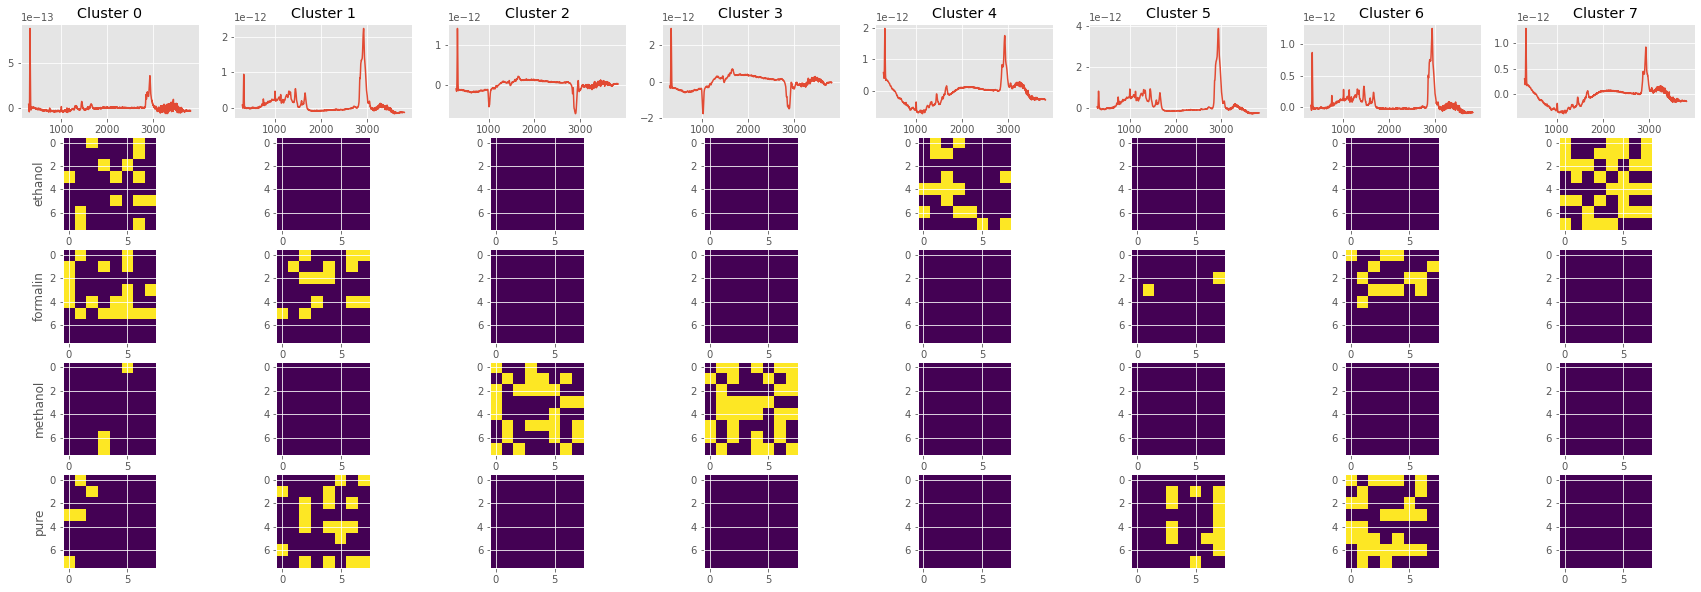

In [18]:
plot_all(64, 8, 8, 4, labels_arr)